# The building blocks

In this course we will be mainly concerned with the study of many-body quantum systems, systems made by many copies of individual consituentes.  Say e.g. spins $s=\frac{1}{2}$. 

## Single spin
In this specific case, the states of a single constituent span a two dimensional complex Hilbert space. We can thus use a vector with two complex components
$|\phi\rangle = c_0 |0\rangle + c_1 |1\rangle$

The aim of this notebok is to understand how to pass from the theory to the practical implementation of the numerical study of such systems. We will use python and the numpy package to do so.
The full documentation is available online at https://numpy.org/doc/stable/.


### E1 Random state
We start by creating a random state of a single spin one half.
Write a python code that uses the numpy random generator in order to create a random state of a spin one half. Store it as a column vector. 
You can use the np.random.rand function to create random numbers.

In [1]:
import numpy as np

# random complex vector (spin 1/2 state)
phases = np.exp(1j * np.random.uniform(0, 2*np.pi, 2))
amps = np.random.uniform(0, 1, 2)
phi = phases * amps
phi = phi.reshape(2,1) # we make it a column vector

print(phi)

[[0.04966249+0.1899789j ]
 [0.09222106-0.60894204j]]


### E2 Normalize your state
In QM states are usually normalized, normalize the state you have created previously:
$\langle \phi|\phi\rangle =1$

(*Hint: use the numpy linalg norm function*) https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [ ]:
import scipy.linalg as LA

phi = phi / LA.norm(phi)  # normalize the state vector
print(LA.norm(phi))  # should be 1.0

1.0


## Defining operators 
Once we have a state we can compute expectation value of operators. Remember operators need to be Hermitian. 
All Hermitian operators can be written as linear combinations of the basis of Hermitian operators. For a single spin 1/2 there are 4 operators in the basis $ 1\equiv \sigma_0, \sigma_x \equiv \sigma_1, \sigma_y \equiv \sigma_2, \sigma_z \equiv \sigma_3$.
They satisfy the algebra

$$\sigma_i \sigma_j = \delta_{ij}+i \epsilon_{ijk}\sigma_k$$

with $\epsilon_{ijk}$ the completely antisymmetric tensor with $\epsilon_{012}=1$
(In this notation summation over repeated indices is implied, called Einstein notation)

Define the Pauli matrices as numpy arrays. You can use np.array to define them.



In [6]:
# Pauli matrices
I = np.eye(2, dtype=complex)
X = np.array([[0, 1],
              [1, 0]], dtype=complex)
Y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)
Z = np.array([[1, 0],
              [0, -1]], dtype=complex)

sigmas = [X, Y, Z]

print("Identity:\n", I)
print("Pauli X:\n", X)
print("Pauli Y:\n", Y)
print("Pauli Z:\n", Z)
print(X@Y)  # matrix multiplication


Identity:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Pauli X:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Pauli Y:
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
Pauli Z:
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]


 ### E3 Construct operators from elements of the basis
 Write an arbitrary operator linear combination of the four above four operators using four complex random   coefficients
$O = c_0 1 + c_i \sigma_i$, normalize it in such a way that 
$c_i c_i^*=1$
 

In [7]:
c = np.random.rand(4,1) / LA.norm(np.random.rand(4,1))
print(LA.norm(c))  # should be 1.0
print(c)
op = c[0] * I + c[1] * X + c[2] * Y + c[3] * Z
print("Random operator:\n", op)

0.6492986115528411
[[1.54513300e-01]
 [2.77287765e-01]
 [5.66414857e-01]
 [1.80225856e-04]]
Random operator:
 [[0.15469353+0.j         0.27728776-0.56641486j]
 [0.27728776+0.56641486j 0.15433307+0.j        ]]


### E4 Find the components in a given basis
Now from the kownledge of the operator $O$, reconstruct its components in the basis of the above operators. 

(*Hint: use the fact that Pauli operators are traceless, and they square to the identity*)

In [9]:
d = np.zeros((4,2), dtype=complex)
d[0] = np.trace(op)/2
d[1] = np.trace(op @ X)/2
d[2] = np.trace(op @ Y)/2
d[3] = np.trace(op @ Z)/2
print("Decomposed coefficients:\n", d)

Decomposed coefficients:
 [[1.54513300e-01+0.j 1.54513300e-01+0.j]
 [2.77287765e-01+0.j 2.77287765e-01+0.j]
 [5.66414857e-01+0.j 5.66414857e-01+0.j]
 [1.80225856e-04+0.j 1.80225856e-04+0.j]]


### E5 Check Hermiticity of the operator
Since we are interested in observable we want the operator to be Hermitian, check that your operator is indeed Hermitian.

you can use the numpy conjugate transpose function np.conj().T  to generate the Hermitian operator and check that all elements are close to the one of the original operator.

In [10]:
np.isclose(op, op.T.conj())  # check if op is Hermitian

array([[ True,  True],
       [ True,  True]])

### E6 Computing expectation values

Given the state $|\phi \rangle$ and the operator $O$, compute the expectation value $\langle \phi |O|\phi \rangle$, assuming a normalized state, in python, you can use the @ operator to perform matrix multiplications. 

In [13]:
exp_O = phi.T.conj() @ op @ phi
print("Expectation value of the operator:", exp_O[0,0])

Expectation value of the operator: (-0.122565772728464-2.42861286636753e-17j)


### E7 Changing basis to states and operators
We can clearly change the basis to operators and states, for example we can re-express the above state and operator in the basis where $\sigma_x$ is diagonal, and the matrix element of the new operator in the new state should be the same than the old one in the old state.

Define the U_x matrix that changes basis from the computational basis to the $\sigma_x$ basis, use it to change basis of both the state and the operator and compute again the expectation value, check that it is the same as before.

In [14]:
U_x = np.array([[1,1],[1,-1]]) / np.sqrt(2)
print(U_x.T @ X @ U_x)  # should be Z
phi_x = U_x.T @ phi
op_x = U_x.T @ op @ U_x
exp_O_x = phi_x.T.conj() @ op_x @ phi_x
print("Expectation value in X-basis:", exp_O_x[0,0])

[[ 1.00000000e+00+0.j -2.23711432e-17+0.j]
 [ 2.23711432e-17+0.j -1.00000000e+00+0.j]]
Expectation value in X-basis: (-0.12256577272846397+3.469446951953614e-17j)


## Two spins

Once we have defined states and operators for a single spin, we can easily extend the formalism to many spins using the tensor product.
Here we have two different types of random states. A random state of two spins built from the random state of a single spin $|\phi \phi\rangle =| \phi\rangle \otimes  |\phi\rangle$, construct it below (*Hint: use the np.kron() function)

In [21]:
phases2 = np.exp(1j * np.random.uniform(0, 2*np.pi, 2))
amps2 = np.random.uniform(0, 1, 2)
phi2 = phases2 * amps2
phi = phi.reshape(2,1) # we make it a column vector
phi2 = phi2 / LA.norm(phi2)

phi_phi = np.kron(phi, phi2).reshape(4,1)
print("Combined state vector:\n", phi_phi)
print("Norm of combined state vector:", LA.norm(phi_phi))  # should be 1.0

Combined state vector:
 [[-0.17672533+0.05547074j]
 [ 0.20335655+0.12887994j]
 [ 0.57794636+0.05906755j]
 [-0.42633209-0.62326335j]]
Norm of combined state vector: 1.0


Now we can compute the expectation value of different operators, for example we can compute the old operator on the first spin, and we should get the same number out $O \otimes 1$. Notice that this is correct since we are dealing with product states. Check it numerically below.

In [22]:
op_tensor_I = np.kron(op, I)
exp_O_combined = phi_phi.T.conj() @ op_tensor_I @ phi_phi
print("Expectation value on combined state:", exp_O_combined[0,0])

Expectation value on combined state: (-0.12256577272846397+0j)


But we can also compute the same operator on the other spin, $1 \otimes O$, and the result is different. Check it numerically below.

In [26]:
I_tensor_op = np.kron(I, op)
exp_O_combined_2 = phi_phi.T.conj() @ I_tensor_op @ phi_phi
print("Expectation value on combined state (op on second qubit):", exp_O_combined_2[0,0])

Expectation value on combined state (op on second qubit): (-0.43667378441837307+1.3877787807814457e-17j)


We can now write  multi-spin operators $O \otimes O$ and their combinations, try it with the operator you have defined before.

In [27]:
op_tensor_op = np.kron(op, op)
exp_O_combined_3 = phi_phi.T.conj() @ op_tensor_op @ phi_phi
print("Expectation value on combined state (op on both qubits):", exp_O_combined_3[0,0])

Expectation value on combined state (op on both qubits): (0.0535212598175006+9.107298248878237e-18j)


### The cost of increasing the number of spins. 
We can now try to understand what is the cost of increasing the number of spins. From the computational point of view there are two kinds of cost. One is the cost of storing the state of the system in memory, typically called the *space* cost, the other is the cost entailed with performing the computation, typically called the *time* cost. 
You have learnt about these aspects in the lecture notes, here we take a pragmatic approach. 

We will first plot the *space* cost as a function of the number of constituents. 

In order to do so we will create random states of N spins, and we will check how much memory they occupy. The states are product states of N random single spin states, however for the purpose of this exercise this does not matter, since using kron we explicitly create the full state.
In order to check the memory occupied by a numpy array you can use the nbytes attribute of the array or np.size function.

Compute the memory occupied by random states of N spins, with N ranging from 1 to 10, and plot the result in a log scale. What do you observe?

Plots are produced using the matplotlib package, full documentation is available online at https://matplotlib.org/stable/contents.html.


In [30]:
import matplotlib.pyplot as plt

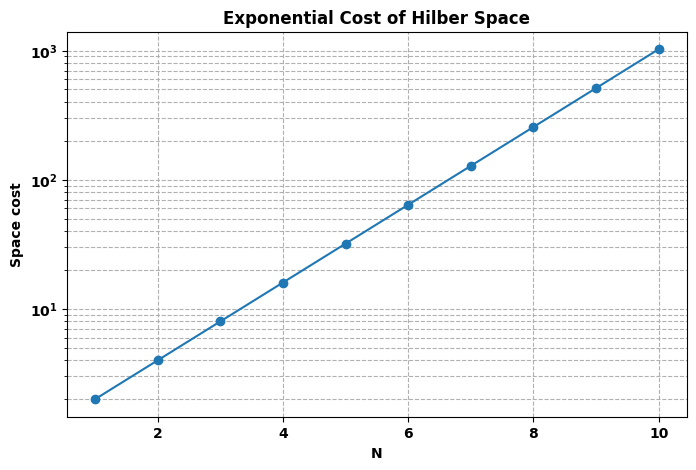

In [38]:
space_cost = []
N_values = range(1,11)

current_state = phi

for N in N_values:
    space_cost.append(np.size(current_state))
    if N < N_values[-1]:
        current_state = np.kron(current_state, phi)

plt.figure(figsize=(8,5))
plt.plot(N_values, space_cost, marker='o', ls ='-')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Space cost')
plt.title('Exponential Cost of Hilber Space')
plt.grid(True, which="both", ls="--")
plt.show()

We can also now compute the time it takes to compute the expectation value of a given observable, as a function of the number of spins.

We can use the time package to measure the time it takes to perform a given operation.

Documentation is available online at https://docs.python.org/3/library/time.html.

Here you need to both generate the random state and the operator.

Text(0.5, 1.0, 'Exponential Time Cost to compute expectation values')

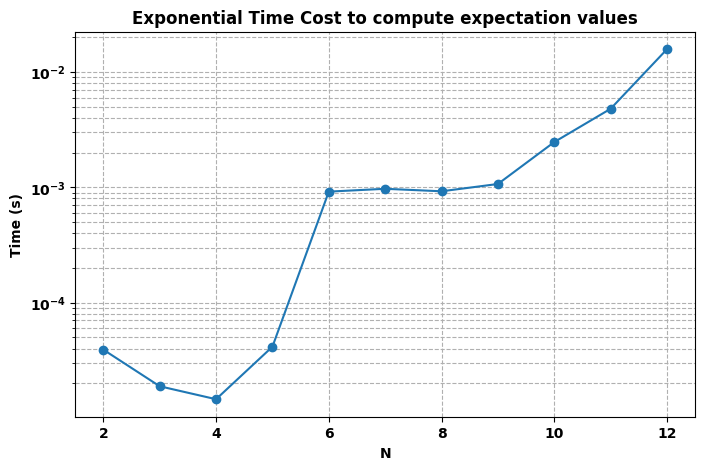

In [40]:
import time

N_values = range(2, 13)
times_to_execute = []

current_state = phi
current_op = op

# Let us measure the time it takes to compute the expectation value as the system grows
for N in N_values:
    current_state = np.kron(current_state, phi) # grow the state
    current_op = np.kron(current_op, I)

    t1 = time.time() # measure time

    result = current_state.T.conj() @ current_op @ current_state # expectation value

    t2 = time.time()

    times_to_execute.append(t2 - t1)

plt.figure(figsize=(8,5))
plt.plot(N_values, times_to_execute, marker='o', ls ='-')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.grid(True, which="both", ls="--")
plt.title('Exponential Time Cost to compute expectation values')


### Our first tensor network
We have not used at all the fact that the sites we are dealing with are very special, in the sense that they are product state. In order to see this we can compute the connected correlation functions, that is, the value of

$\langle O_1 O_2 \rangle -\langle O_1\rangle \langle O_2\rangle$. 

Let us do it for the case of three spins, for simplicity, 

Check that the result is zero, as expected for product states.



In [41]:
# 3-spin state |phi>|phi>|phi>
phi_3 = np.kron(np.kron(phi, phi), phi).reshape(8,1)

# Let us study correlations between first and third spin
op_1_3 = np.kron(np.kron(op, I), op) # term <O1 O3> -> O x I x O
exp_1 = np.kron(np.kron(op,I), I) # term <O1> -> O x I x I
exp_3 = np.kron(np.kron(I,I), op) # term <O3> -> I x I x O

# Compute expectation values
E_1_3 = (phi_3.T.conj() @ op_1_3 @ phi_3)[0,0]
E_1 = (phi_3.T.conj() @ exp_1 @ phi_3)[0,0]
E_3 = (phi_3.T.conj() @ exp_3 @ phi_3)[0,0]

# Correlation function
C_1_3 = E_1_3 - (E_1 * E_3)

print("Correlation between spin 1 and 3:", C_1_3)

Correlation between spin 1 and 3: (-1.734723475976807e-17-3.5767206750586815e-19j)


As seen in the previous explicit example that value always vanishes, as a consequence of the structure of the state.
As a result
$⟨𝑂_1𝑂_2⟩=⟨𝑂_1⟩⟨𝑂_2⟩$ for product states, leading to a huge simplification. Indeed we can now compute any arbitrary correlation function or operator by just multiplying the values of local operators. Rather than explicitly building our large tensor product state, we can just keep a list of individual product states, and use it to compute expectation values.

Wrt to expectation of local operators these states always like pure state 
$\rho =|\phi\rangle\langle \phi|$,
such that local expectation values are given as expected as 
$\langle O \rangle = \textrm{tr}(\rho O) =\langle \phi |O |\phi \rangle$


## The generic multi-spin state
We also have the case of a generic random state of the two spins. How do we get it? We can evolve any initial state of the Hilbert space of the two spins under the action of a random Hamiltonian for unit time. The only request is that the Hamiltonian is Hermitian, so rather than following the ideas of the previous section we just build a random $2^N \times 2^N$ Hamiltonian, that is extensive and build the corresponding state.

In order to build the evolution operator $U = e^{-i H}$ we can use the scipy.linalg expm function, documentation is available online at https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html.
Write a python code that builds such a random state for two spins and computes the expectation value of the operator $O \otimes O$ on it.

Check what happens to the connected correlation function in this case.




In [ ]:
# random single-spin op (hermitian)
op = np.random.rand(2,2) + 1j * np.random.rand(2,2)
op = op + op.T.conj()  # make it Hermitian
op = op / LA.norm(op)
I = np.eye(2, dtype=complex)

# construct O x O, O x I, I x O
op_op = np.kron(op, op)
op_I = np.kron(op, I)
I_op = np.kron(I, op)

# dimension for 2 spins = 4
dim = 4

# random hamiltoinian
H_rand = np.random.rand(dim,dim) + 1j * np.random.rand(dim,dim)
H_rand = H_rand + H_rand.T.conj()  # make it Hermitian
H_rand = H_rand / LA.norm(H_rand)

# evolution operator U = e^{-i H}
U = LA.expm(-1j * H_rand * 40) # multiply by big prefactor to ensure the Hamiltonian has enough "energy" to fully scramble the quantum state

# evolve initial state |00>
psi_0 = np.zeros((dim,1), dtype=complex)
psi_0[0] = 1.0 # state (1,0,0,0) = |00>
psi_random = U @ psi_0

# compute expectation values
E_op_op = (psi_random.T.conj() @ op_op @ psi_random)[0,0]
E_op_I = (psi_random.T.conj() @ op_I @ psi_random)[0,0]
E_I_op = (psi_random.T.conj() @ I_op @ psi_random)[0,0]

# connected correlation function
corr = E_op_op - (E_op_I * E_I_op)

print(f"<O x O> = {E_op_op:.4f}")
print(f"<O> x <O> = {E_op_I * E_I_op:.4f}")
print(f"Connected correlation: {corr:.4f}")



<O x O> = 0.1885-0.0000j
<O> x <O> = 0.0292-0.0000j
Connected correlation: 0.1593-0.0000j


At last we can consider more than two spins. 
Generate the random state using the above strategy for $N$ spins, compute the entanglement entropy of half of the system.

Plot is a function of N, for N ranging from 2 to 10.
What do you observe?

Notice that given we are using random states, you should average over different realizations of the random state to get a meaningful result.
Plot the average value and the standard deviation as error bars in order to have a feeling of the fluctuations.

Simulating for N= [2, 4, 6, 8, 10]


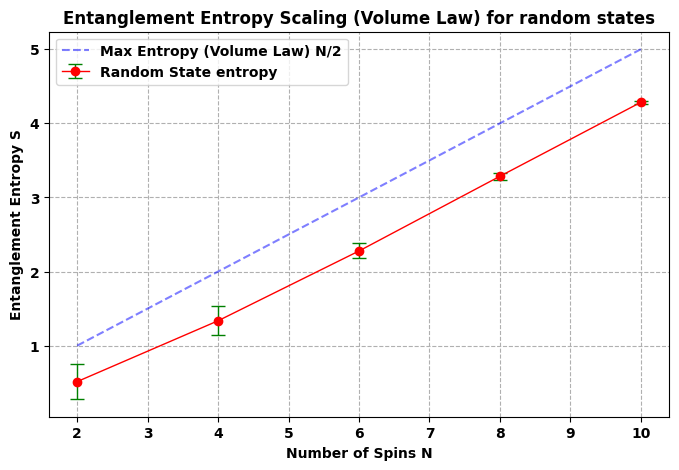

In [55]:
mean_ent = [] # mean entanglement entropy list
std_ent = []

N_values = range(2, 12, 2)

print("Simulating for N=", list(N_values))

for N in N_values:
    dim_h = 2**N
    ent_entropies = []
    for _ in range(50): # avg over 50 random realizations (random states)
        psi_0 = np.zeros((dim_h, 1))
        psi_0[0] = 1.0  # initial state |00...0>

        # random hamiltonian
        H_rand = np.random.rand(dim_h,dim_h) + 1j * np.random.rand(dim_h,dim_h)
        H_rand = H_rand + H_rand.T.conj()
        H_rand = H_rand / LA.norm(H_rand)

        # evolution operator
        U_rand = LA.expm(-1j * H_rand * N**4 * 100) # large prefactor to ensure scrambling
        psi_random = U_rand @ psi_0  # evolved random state

        # Schmidt decomposition between left half and right half
        dim_half = int(2**(N/2))
        psi_reshaped = psi_random.reshape(dim_half, dim_half)

        # svd returns singular values where rho_eigenvalues = s**2
        _, s, _ = LA.svd(psi_reshaped, full_matrices=False)

        # compute entanglement entropy S = - sum_i (lambda_i * log lambda_i)
        rho_eig = s**2
        rho_eig = rho_eig[rho_eig > 1e-15]  # filter out zero eigenvalues
        ent = -np.sum(rho_eig * np.log2(rho_eig))

        ent_entropies.append(ent)

    mean_ent.append(np.mean(ent_entropies))
    std_ent.append(np.std(ent_entropies))

# plotting
plt.figure(figsize=(8,5))
plt.errorbar(N_values, mean_ent, yerr=std_ent, 
             marker='o', color='red', ecolor='green',
              capsize=5, ls='-', lw=1, label='Random State entropy')

# Theoretical line for volume law S_max = (N/2) * log2(2) = N/2
# note random state are typically close to maximally entangled
S_max = [N/2 for N in N_values]
plt.plot(N_values, S_max, ls='--', color='blue', alpha=0.5, label='Max Entropy (Volume Law) N/2')

plt.xlabel('Number of Spins N')
plt.ylabel('Entanglement Entropy S')
plt.title('Entanglement Entropy Scaling (Volume Law) for random states')
plt.legend()
plt.grid(True, ls="--")
plt.show()

We can observe the Volume Law (Linear Growth): 

1. The entropy $S$ grows linearly with $N$. specifically, $S \approx \frac{N}{2}$.
2. Meaning: For a random state, the information is "smeared" out over the entire Hilbert space. The amount of entanglement between one half and the other is proportional to the number of particles in the partition (the volume of the subsystem).
3. Contrast: This is very different from "Area Law" states (like ground states of local Hamiltonians), where entropy would saturate or grow much slower.

At the end of this notebook you should be able to understand how to build states and operators for many-body quantum systems, and how to compute expectation values of operators on such states.
You should also be able to understand the difference between product states and generic entangled states, and how this reflects in the computation of expectation values of operators.
What is the entanglement entropy of half of a random state of N spins, as a function of N?

Answer: For a generic random state, the entanglement entropy of half the system is approximately half the total number of spins ($S \approx N/2$), exhibiting Volume Law scaling (the entanglement depends on the "volume" of the subsystem, implying that quantum information is delocalized across the entire system). This confirms that typical states in the Hilbert space are maximally entangled.